/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,473 (68.25 KB)

 Trainable params: 17,473 (68.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0627 - val_loss: 0.0081
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0

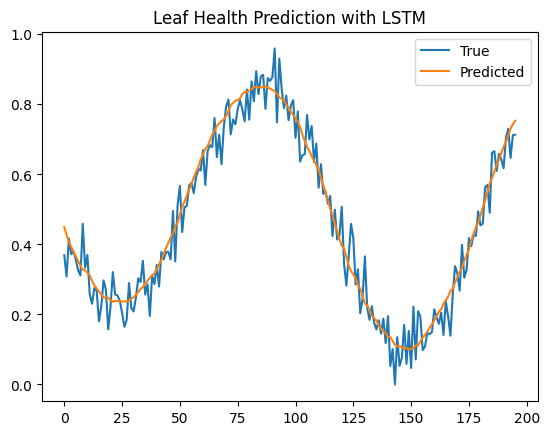

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 1. Generate synthetic time-series data
def generate_leaf_data(n_samples=1000):
    np.random.seed(42)
    temp = np.sin(np.linspace(0, 50, n_samples)) + np.random.normal(0, 0.1, n_samples)
    humidity = np.cos(np.linspace(0, 50, n_samples)) + np.random.normal(0, 0.1, n_samples)
    sunlight = np.clip(np.sin(np.linspace(0, 25, n_samples)), 0, 1)
    leaf_health = 0.3 * temp + 0.5 * humidity + 0.2 * sunlight + np.random.normal(0, 0.05, n_samples)

    data = np.stack([temp, humidity, sunlight, leaf_health], axis=1)
    return data

data = generate_leaf_data()

# 2. Normalize
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 3. Prepare sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len, :3])  # temp, humidity, sunlight
        y.append(data[i+seq_len, 3])     # leaf health
    return np.array(X), np.array(y)

SEQ_LEN = 20
X, y = create_sequences(data_scaled, SEQ_LEN)

# 4. Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(SEQ_LEN, 3)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# 6. Train
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# 7. Evaluate
preds = model.predict(X_test)
plt.plot(y_test, label='True')
plt.plot(preds, label='Predicted')
plt.legend()
plt.title("Leaf Health Prediction with LSTM")
plt.show()